# Smart-Yoga Pillow (SaYoPillow) Overview

Considering today's lifestyle, people just sleep, often forgetting the benefits sleep provides to the human body. The Smart-Yoga Pillow, or SaYoPillow, is proposed to help in understanding the relationship between stress and sleep and to fully materialize the idea of "Smart-Sleeping" by proposing an edge device. This device includes:

- An **edge processor** with a model analyzing the physiological changes that occur during sleep, along with the sleeping habits.
- Prediction of **stress levels** for the following day based on these changes during sleep.
- The **secure transfer** of the analyzed stress data, along with the average physiological changes, to the IoT cloud for storage.
- A **secure transfer** of any data from the cloud to any third-party applications.
- A **user interface** allowing the user to control the data accessibility and visibility.

SaYoPillow is novel, with security features as well as consideration of sleeping habits for stress reduction, achieving an accuracy of up to 96%.

## Dataset Overview

In the `SaYoPillow.csv` file, you will find the relationship between the following parameters:

- Snoring range of the user
- Respiration rate
- Body temperature
- Limb movement rate
- Blood oxygen levels
- Eye movement
- Number of hours of sleep
- Heart rate
- Stress Levels (categorized as 0 - low/normal, 1 – medium low, 2- medium, 3 - medium high, 4 - high)


In [4]:
import pandas as pd

sayopillow_data = pd.read_csv('SaYoPillow.csv')

sayopillow_data.head()


,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


The SaYoPillow.csv dataset consists of the following columns:

sr: Snoring range
rr: Respiration rate
t: Body temperature
lm: Limb movement rate
bo: Blood oxygen levels
rem: Eye movement (REM - Rapid Eye Movement)
sr.1: Number of hours of sleep (seems to be labeled incorrectly as 'sr.1')
hr: Heart rate
sl: Stress Level (target variable)

The sl column, which represents the stress level, is our target variable. The other columns are the features we can use to predict the stress level.

Next, we can proceed with the following steps:

- Feature Renaming: The column 'sr.1' should be renamed for clarity, as it represents the number of hours of sleep.
- Data Normalization: Since the features have different scales, it's beneficial to normalize or standardize the data.
- Feature and Model Selection: Based on the nature of our target variable (stress level), which is categorical, a classification algorithm would be appropriate. Algorithms such as Random Forest, Gradient Boosting, or Logistic Regression could also be considered.
- Splitting the Data: Divide the dataset into training and testing sets.
- Model Training and Evaluation: Train the model on the training set and evaluate its performance on the test set.
Let's start by renaming the 'sr.1' column and normalizing the data. Then, we'll choose a suitable model for classification.

In [5]:
missing_values = sayopillow_data.isnull().sum()
basic_statistics = sayopillow_data.describe()

missing_values, basic_statistics



(sr      0
 rr      0
 t       0
 lm      0
 bo      0
 rem     0
 sr.1    0
 hr      0
 sl      0
 dtype: int64,
                sr          rr          t          lm          bo         rem  \
 count  630.000000  630.000000  630.00000  630.000000  630.000000  630.000000   
 mean    71.600000   21.800000   92.80000   11.700000   90.900000   88.500000   
 std     19.372833    3.966111    3.52969    4.299629    3.902483   11.893747   
 min     45.000000   16.000000   85.00000    4.000000   82.000000   60.000000   
 25%     52.500000   18.500000   90.50000    8.500000   88.500000   81.250000   
 50%     70.000000   21.000000   93.00000   11.000000   91.000000   90.000000   
 75%     91.250000   25.000000   95.50000   15.750000   94.250000   98.750000   
 max    100.000000   30.000000   99.00000   19.000000   97.000000  105.000000   
 
              sr.1          hr          sl  
 count  630.000000  630.000000  630.000000  
 mean     3.700000   64.500000    2.000000  
 std      3.054572  

We have 630 samples so let's split 80% of the data for training and 20% for testing. We have 504 samples in the training set and 126 samples in the testing set, with 8 features each.

 Given the nature of the dataset and that this is a classification problem, I suggest using a Gradient Boosting Classifier. This model is often effective for classification tasks with different feature types and scales, as it builds multiple decision trees sequentially and each tree is corrected by the tree before it.

Let's proceed with the following steps:

- Model Training: Train the Gradient Boosting Classifier on the training set.
- Model Evaluation: Evaluate the model's performance on the test set using metrics like accuracy, precision, recall, and F1-score.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Renaming the 'sr.1' column to 'hours_of_sleep'
sayopillow_data.rename(columns={'sr.1': 'hours_of_sleep'}, inplace=True)

# Separating features and target variable
X = sayopillow_data.drop('sl', axis=1)
y = sayopillow_data['sl']

# Normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Checking the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((504, 8), (126, 8), (504,), (126,))

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train using the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep



(0.9761904761904762,
 '              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98        23\n           1       1.00      0.92      0.96        24\n           2       0.93      1.00      0.97        28\n           3       1.00      0.96      0.98        26\n           4       1.00      1.00      1.00        25\n\n    accuracy                           0.98       126\n   macro avg       0.98      0.98      0.98       126\nweighted avg       0.98      0.98      0.98       126\n')

**Overall Accuracy**: The model achieved an accuracy of approximately **97.6%**. This high accuracy level indicates a strong precision in predicting stress levels based on the given physiological parameters.

### Metrics

1. **Precision**
   - Precision measures accuracy of positive predictions.
   - **Example**: When the model predicts stress level 1, it is correct 100% of the time.

2. **Recall**
   - Recall indicates the model's ability to find all relevant instances within each category.
   - **Example**: The model correctly identifies 100% of all true instances of stress level 0.

3. **F1-Score**
   - The F1-score provides a balance between precision and recall.
   - It gives a fuller view of the model's accuracy across each category.

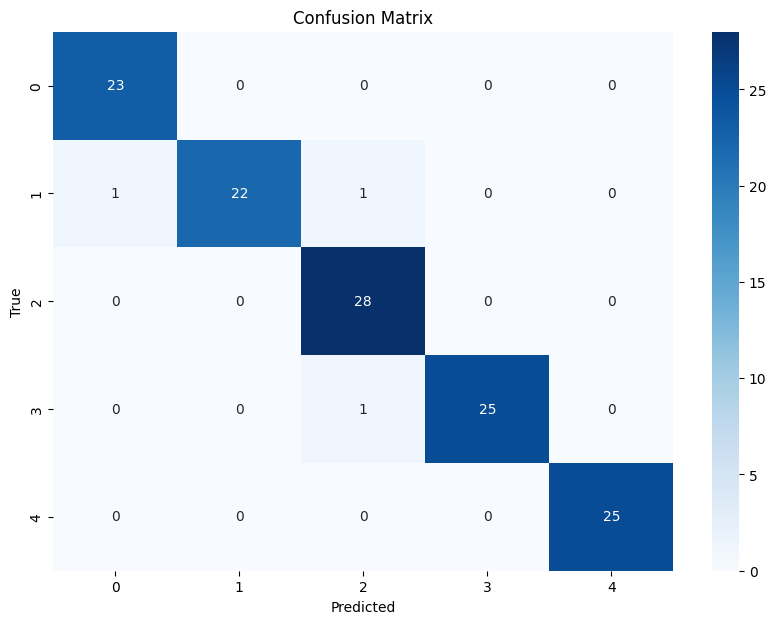

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=[0, 1, 2, 3, 4], yticklabels=[0, 1, 2, 3, 4])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Confusion Matrix
displays the true labels versus the predicted labels.
- **Diagonal Elements**: these represent correct predictions, where the predicted stress level matches the true stress level.
- **Off-Diagonal Elements**: These indicate misclassifications, where the model's predictions differ from the actual stress levels.
- **Insight**: This helps us understand the model's accuracy more, showing where it does well and has errors.



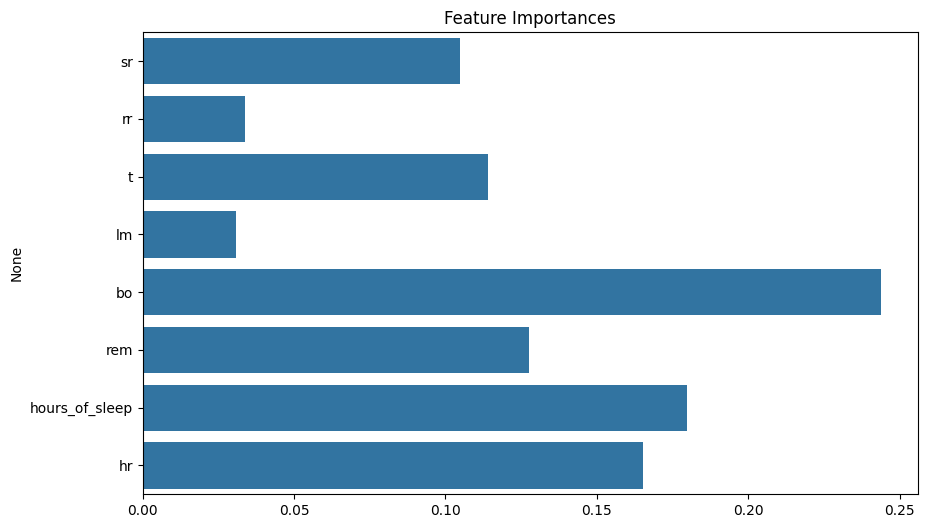

In [12]:
feature_importance = gb_classifier.feature_importances_
features = sayopillow_data.columns[:-1]  # excluding the target variable
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importances')
plt.show()

## Feature Importance Plot
highlights the importance of each feature in the model’s decision-making process.
- **Observations**: 
  - Features with higher importance scores have a greater impact on the model's predictions.
  - This helps in understanding which physiological parameters (like heart rate or sleep duration) are most influential in predicting stress levels.

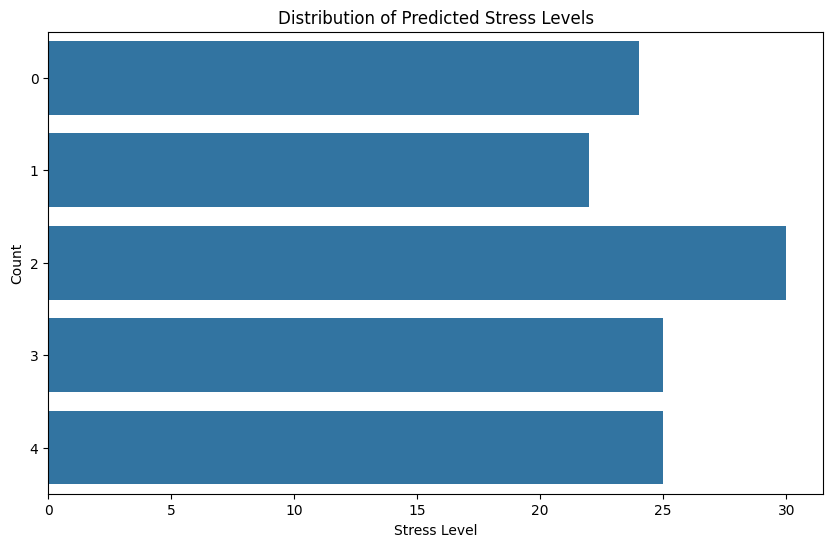

In [14]:
# Ensure that y_pred is of type 'category'
y_pred_categorical = pd.Categorical(y_pred, categories=[0, 1, 2, 3, 4])

plt.figure(figsize=(10, 6))
sns.countplot(y_pred_categorical)
plt.title('Distribution of Predicted Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

## Distribution of Predicted Stress Levels
shows how the model's predictions are distributed across the different stress levels.
- **Analysis**: 
  - A more balanced distribution suggests that the model does not have a bias towards a specific stress level.
  - It provides an overview of the model's tendency to predict certain stress levels more or less frequently.

In [2]:
import pandas as pd

# Read the CSV file
data = pd.read_csv('SaYoPillow.csv')

# Extract features (X) and target variable (y)
X = data.iloc[:, :-1]  # Selects all rows and the first 10 columns as features
y = data.iloc[:, -1]   # Selects all rows and the last column as the target variable

# Displaying the shapes of X and y
print(f'Shape of X: {X.shape}')  # Should show (number_of_samples, 10)
print(f'Shape of y: {y.shape}')  # Should show (number_of_samples,)


Shape of X: (630, 8)
Shape of y: (630,)


In [3]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Assume 'X' contains your features (heart rate, respiration rate, etc.) and 'y' contains the corresponding stress levels

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVM classifier
clf = svm.SVC(kernel='linear')  # You can choose different kernels (linear, polynomial, RBF, etc.)

# Train the classifier
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



## Citations

- L. Rachakonda, A. K. Bapatla, S. P. Mohanty, and E. Kougianos, "SaYoPillow: Blockchain-Integrated Privacy-Assured IoMT Framework for Stress Management Considering Sleeping Habits", *IEEE Transactions on Consumer Electronics (TCE)*, Vol. 67, No. 1, Feb 2021, pp. 20-29.
- L. Rachakonda, S. P. Mohanty, E. Kougianos, K. Karunakaran, and M. Ganapathiraju, "Smart-Pillow: An IoT based Device for Stress Detection Considering Sleeping Habits", in Proceedings of the 4th IEEE International Symposium on Smart Electronic Systems (iSES), 2018, pp. 161--166.